<a href="https://colab.research.google.com/github/Sudhakathir16/sql-asignment/blob/main/Penguins_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

In [54]:
df = pd.read_csv('/content/deliveries.csv')

In [55]:
penguins_df = pd.read_csv('/content/penguins.csv')

In [56]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [57]:
df.info

<bound method DataFrame.info of         match_id  inning                 batting_team  \
0              1       1          Sunrisers Hyderabad   
1              1       1          Sunrisers Hyderabad   
2              1       1          Sunrisers Hyderabad   
3              1       1          Sunrisers Hyderabad   
4              1       1          Sunrisers Hyderabad   
...          ...     ...                          ...   
150455       636       2  Royal Challengers Bangalore   
150456       636       2  Royal Challengers Bangalore   
150457       636       2  Royal Challengers Bangalore   
150458       636       2  Royal Challengers Bangalore   
150459       636       2  Royal Challengers Bangalore   

                       bowling_team  over  ball        batsman    non_striker  \
0       Royal Challengers Bangalore     1     1      DA Warner       S Dhawan   
1       Royal Challengers Bangalore     1     2      DA Warner       S Dhawan   
2       Royal Challengers Bangalore     1     3      DA Warner       S Dhawan   
3       Royal Challengers Bangalore     1     4      DA Warner       S Dhawan   
4       Royal Challengers Bangalore     1     5      DA Warner       S Dhawan   
...                             ...   ...   ...            ...            ...   
150455          Sunrisers Hyderabad    20     2    Sachin Baby      CJ Jordan   
150456          Sunrisers Hyderabad    20     3    Sachin Baby      CJ Jordan   
150457          Sunrisers Hyderabad    20     4  Iqbal Abdulla    Sachin Baby   
150458          Sunrisers Hyderabad    20     5    Sachin Baby  Iqbal Abdulla   
150459          Sunrisers Hyderabad    20     6  Iqbal Abdulla    Sachin Baby   

          bowler  is_super_over  ...  bye_runs  legbye_runs  noball_runs  \
0       TS Mills              0  ...         0            0            0   
1       TS Mills              0  ...         0            0            0   
2       TS Mills              0  ...         0            0            0   
3       TS Mills              0  ...         0            0            0   
4       TS Mills              0  ...         0            0            0   
...          ...            ...  ...       ...          ...          ...   
150455   B Kumar              0  ...         0            0            0   
150456   B Kumar              0  ...         0            0            0   
150457   B Kumar              0  ...         0            1            0   
150458   B Kumar              0  ...         0            0            0   
150459   B Kumar              0  ...         0            0            0   

        penalty_runs  batsman_runs  extra_runs  total_runs  player_dismissed  \
0                  0             0           0           0               NaN   
1                  0             0           0           0               NaN   
2                  0             4           0           4               NaN   
3                  0             0           0           0               NaN   
4                  0             0           2           2               NaN   
...              ...           ...         ...         ...               ...   
150455             0             2           0           2               NaN   
150456             0             0           0           0         CJ Jordan   
150457             0             0           1           1               NaN   
150458             0             1           0           1               NaN   
150459             0             4           0           4               NaN   

       dismissal_kind  fielder  
0                 NaN      NaN  
1                 NaN      NaN  
2                 NaN      NaN  
3                 NaN      NaN  
4                 NaN      NaN  
...               ...      ...  
150455            NaN      NaN  
150456        run out  NV Ojha  
150457            NaN      NaN  
150458            NaN      NaN  
150459            NaN      NaN  

[150460 rows x 21 columns]>

In [58]:
df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000
mean,318.281317,1.482188,10.142649,3.616483,0.000538,0.037498,0.004885,0.022232,0.004340,0.000066,1.222445,0.069022,1.291466
std,182.955531,0.501768,5.674338,1.807698,0.023196,0.257398,0.114234,0.200104,0.072652,0.018229,1.594509,0.349667,1.583240
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,319.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,476.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,636.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


In [59]:
df.value_counts

<bound method DataFrame.value_counts of         match_id  inning                 batting_team  \
0              1       1          Sunrisers Hyderabad   
1              1       1          Sunrisers Hyderabad   
2              1       1          Sunrisers Hyderabad   
3              1       1          Sunrisers Hyderabad   
4              1       1          Sunrisers Hyderabad   
...          ...     ...                          ...   
150455       636       2  Royal Challengers Bangalore   
150456       636       2  Royal Challengers Bangalore   
150457       636       2  Royal Challengers Bangalore   
150458       636       2  Royal Challengers Bangalore   
150459       636       2  Royal Challengers Bangalore   

                       bowling_team  over  ball        batsman    non_striker  \
0       Royal Challengers Bangalore     1     1      DA Warner       S Dhawan   
1       Royal Challengers Bangalore     1     2      DA Warner       S Dhawan   
2       Royal Challengers Bangalore     1     3      DA Warner       S Dhawan   
3       Royal Challengers Bangalore     1     4      DA Warner       S Dhawan   
4       Royal Challengers Bangalore     1     5      DA Warner       S Dhawan   
...                             ...   ...   ...            ...            ...   
150455          Sunrisers Hyderabad    20     2    Sachin Baby      CJ Jordan   
150456          Sunrisers Hyderabad    20     3    Sachin Baby      CJ Jordan   
150457          Sunrisers Hyderabad    20     4  Iqbal Abdulla    Sachin Baby   
150458          Sunrisers Hyderabad    20     5    Sachin Baby  Iqbal Abdulla   
150459          Sunrisers Hyderabad    20     6  Iqbal Abdulla    Sachin Baby   

          bowler  is_super_over  ...  bye_runs  legbye_runs  noball_runs  \
0       TS Mills              0  ...         0            0            0   
1       TS Mills              0  ...         0            0            0   
2       TS Mills              0  ...         0            0            0   
3       TS Mills              0  ...         0            0            0   
4       TS Mills              0  ...         0            0            0   
...          ...            ...  ...       ...          ...          ...   
150455   B Kumar              0  ...         0            0            0   
150456   B Kumar              0  ...         0            0            0   
150457   B Kumar              0  ...         0            1            0   
150458   B Kumar              0  ...         0            0            0   
150459   B Kumar              0  ...         0            0            0   

        penalty_runs  batsman_runs  extra_runs  total_runs  player_dismissed  \
0                  0             0           0           0               NaN   
1                  0             0           0           0               NaN   
2                  0             4           0           4               NaN   
3                  0             0           0           0               NaN   
4                  0             0           2           2               NaN   
...              ...           ...         ...         ...               ...   
150455             0             2           0           2               NaN   
150456             0             0           0           0         CJ Jordan   
150457             0             0           1           1               NaN   
150458             0             1           0           1               NaN   
150459             0             4           0           4               NaN   

       dismissal_kind  fielder  
0                 NaN      NaN  
1                 NaN      NaN  
2                 NaN      NaN  
3                 NaN      NaN  
4                 NaN      NaN  
...               ...      ...  
150455            NaN      NaN  
150456        run out  NV Ojha  
150457            NaN      NaN  
150458            NaN      NaN  
150459            NaN      NaN  

[150460 rows x 21 columns]>

In [60]:
df.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batsman,0
non_striker,0
bowler,0
is_super_over,0


In [61]:
df.dtypes

,0
match_id,int64
inning,int64
batting_team,object
bowling_team,object
over,int64
ball,int64
batsman,object
non_striker,object
bowler,object
is_super_over,int64


In [62]:
df.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
150459,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,6,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [63]:
df.duplicated().sum()

np.int64(1)

In [64]:
print("Number of Rows:",df.shape[0])

Number of Rows: 150460


In [65]:
print("Number of Column:",df.shape[1])

Number of Column: 21


What is the average body mass of each penguin species?


In [66]:
df_clean = penguins_df.dropna(subset=['body_mass_g'])

In [67]:
avg_mass = df_clean.groupby('species')['body_mass_g'].mean().reset_index()


In [68]:
print(avg_mass)

     species  body_mass_g
0     Adelie  3700.662252
1  Chinstrap  3733.088235
2     Gentoo  5076.016260


Which island has the highest number of penguin observations?



In [69]:
penguins_df['island'].value_counts()

,count
island,
Biscoe,168
Dream,124
Torgersen,52


In [70]:
penguins_df.groupby('island').size()

,0
island,
Biscoe,168
Dream,124
Torgersen,52


In [71]:
penguins_df['island'].value_counts().reset_index()

,island,count
0,Biscoe,168
1,Dream,124
2,Torgersen,52


In [72]:
island_counts = penguins_df['island'].value_counts().reset_index()
island_counts.columns = ['island', 'count']

In [73]:
print(island_counts)

      island  count
0     Biscoe    168
1      Dream    124
2  Torgersen     52


What is the distribution of penguin sexes across different species?


In [74]:
penguins_clean = penguins_df.dropna(subset=['species', 'sex'])
# Group and count
sex_dist = penguins_clean.groupby(['species', 'sex']).size().reset_index(name='count')

# Pivot for better display
sex_pivot = sex_dist.pivot(index='species', columns='sex', values='count').fillna(0).astype(int)

In [75]:
print(sex_pivot)

sex        female  male
species                
Adelie         73    73
Chinstrap      34    34
Gentoo         58    61


re there any missing values in the dataset, and which columns are most affected?



In [76]:
penguins_df.isnull().sum()

,0
id,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11
year,0


In [77]:
penguins_df.isnull().mean() * 100

,0
id,0.000000
species,0.000000
island,0.000000
bill_length_mm,0.581395
bill_depth_mm,0.581395
flipper_length_mm,0.581395
body_mass_g,0.581395
sex,3.197674
year,0.000000


In [78]:
penguins_df.isnull().sum()

,0
id,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11
year,0


What is the correlation between flipper length, bill dimensions, and body mass?



In [79]:
cols = ['flipper_length_mm', 'bill_length_mm', 'bill_depth_mm', 'body_mass_g']

In [80]:
penguins_clean = penguins_df[cols].dropna()


In [81]:
corr_matrix = penguins_clean.corr()


In [82]:
print(corr_matrix)


                   flipper_length_mm  bill_length_mm  bill_depth_mm  \
flipper_length_mm           1.000000        0.656181      -0.583851   
bill_length_mm              0.656181        1.000000      -0.235053   
bill_depth_mm              -0.583851       -0.235053       1.000000   
body_mass_g                 0.871202        0.595110      -0.471916   

                   body_mass_g  
flipper_length_mm     0.871202  
bill_length_mm        0.595110  
bill_depth_mm        -0.471916  
body_mass_g           1.000000  


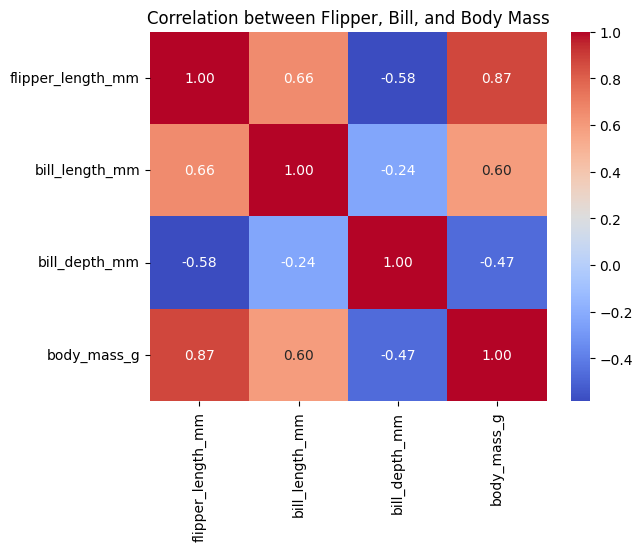

In [83]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Flipper, Bill, and Body Mass")
plt.show()

How does bill length vary across different penguin species?



In [84]:
penguins_clean = penguins_df.dropna(subset=['species', 'bill_length_mm'])
# Group by species and summarize bill length
bill_summary = penguins_clean.groupby('species')['bill_length_mm'].describe()

print(bill_summary)




           count       mean       std   min    25%    50%     75%   max
species                                                                
Adelie     151.0  38.791391  2.663405  32.1  36.75  38.80  40.750  46.0
Chinstrap   68.0  48.833824  3.339256  40.9  46.35  49.55  51.075  58.0
Gentoo     123.0  47.504878  3.081857  40.9  45.30  47.30  49.550  59.6


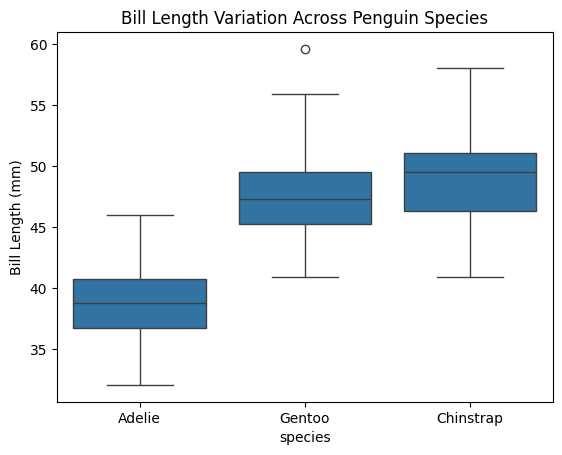

In [85]:
sns.boxplot(x='species', y='bill_length_mm', data=penguins_clean)
plt.title('Bill Length Variation Across Penguin Species')
plt.ylabel('Bill Length (mm)')
plt.show()

What is the distribution of body mass across different islands?



In [86]:
penguins_clean = penguins_df.dropna(subset=['island', 'body_mass_g'])
# Group by island and summarize body mass
body_mass_summary = penguins_clean.groupby('island')['body_mass_g'].describe()

print(body_mass_summary)


           count         mean         std     min     25%     50%      75%  \
island                                                                       
Biscoe     167.0  4716.017964  782.855743  2850.0  4200.0  4775.0  5325.00   
Dream      124.0  3712.903226  416.644112  2700.0  3400.0  3687.5  3956.25   
Torgersen   51.0  3706.372549  445.107940  2900.0  3337.5  3700.0  4000.00   

              max  
island             
Biscoe     6300.0  
Dream      4800.0  
Torgersen  4700.0  


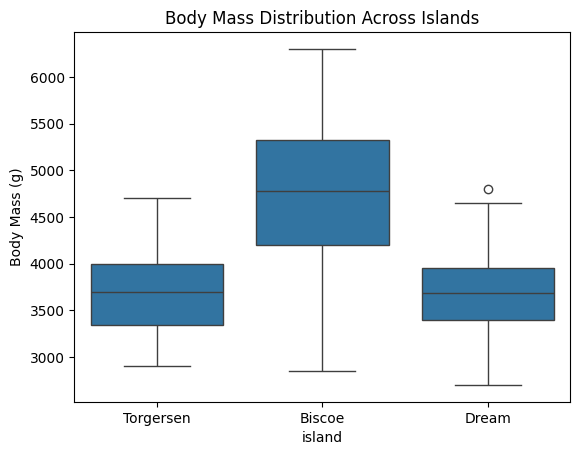

In [87]:
sns.boxplot(x='island', y='body_mass_g', data=penguins_clean)
plt.title('Body Mass Distribution Across Islands')
plt.ylabel('Body Mass (g)')
plt.show()

How does flipper length relate to body mass across species?



In [88]:
# Drop rows with missing values in required columns
penguins_clean = penguins_df.dropna(subset=['flipper_length_mm', 'body_mass_g', 'species'])

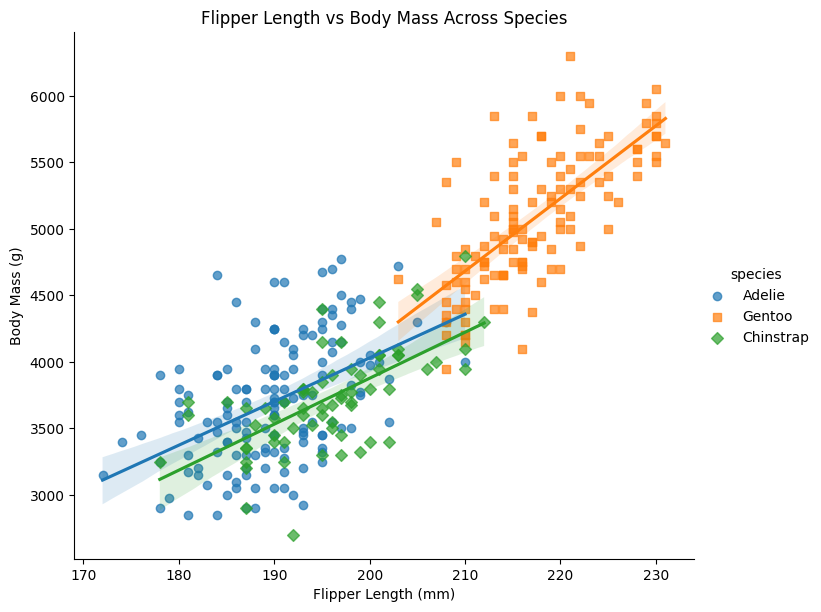

In [89]:
# Scatter plot with regression lines
sns.lmplot(
    data=penguins_clean,
    x='flipper_length_mm',
    y='body_mass_g',
    hue='species',
    height=6,
    aspect=1.2,
    markers=['o', 's', 'D'],
    scatter_kws={'alpha': 0.7}
)
plt.title('Flipper Length vs Body Mass Across Species')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()

In [90]:
# Optional: compute correlation per species
corrs = penguins_clean.groupby('species').apply(
    lambda df: df['flipper_length_mm'].corr(df['body_mass_g'])
)

print("\nCorrelation between flipper length and body mass (by species):")
print(corrs)


Correlation between flipper length and body mass (by species):
species
Adelie       0.468202
Chinstrap    0.641559
Gentoo       0.702667
dtype: float64


Are male penguins generally heavier than female penguins?

In [91]:
penguins_clean = penguins_df.dropna(subset=['sex', 'body_mass_g'])


In [92]:
# Group and compute mean body mass by sex
mass_by_sex = penguins_clean.groupby('sex')['body_mass_g'].describe()
print(mass_by_sex)

        count         mean         std     min     25%     50%     75%     max
sex                                                                           
female  165.0  3862.272727  666.172050  2700.0  3350.0  3650.0  4550.0  5200.0
male    168.0  4545.684524  787.628884  3250.0  3900.0  4300.0  5312.5  6300.0


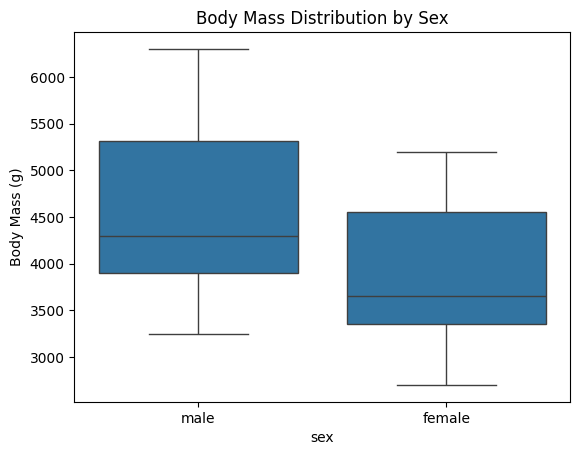

In [93]:
sns.boxplot(x='sex', y='body_mass_g', data=penguins_clean)
plt.title('Body Mass Distribution by Sex')
plt.ylabel('Body Mass (g)')
plt.show()